# Linear Factor Models

Performance Measurement

Risk_Factors.xlsx contains monthly observations of the risk-free rate and the three Fama–French risk factors (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013.

Using excess returns for the ten industry portfolios, calculate the following performance metrics:

Sharpe ratio
Sortino ratio (using risk-free rate as target)
Treynor ratio (using CAPM β)
Jensen's α
Three-factor α

Create a table showing the performance metrics for the ten industry portfolios.

Plot your results as a bar chart for each performance metric.

Briefly explain the economic significance of each of the three performance ratios (but not α's).

### Import modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

### Import and read file_path "Industry_Portfolios.csv", "Risk_Factors", "Market_Portfolio". Rename as per download file. Save the file in the same path as where this jupyter file is save

In [27]:
# Create a list of file paths
file_paths = ['Industry_Portfolios.csv', 'Risk_Factors.csv', 'Market_Portfolio.csv']

# Create a dictionary to store DataFrames
dataframes = {}

# Loop through the file paths and read CSV files
for file_path in file_paths:
    # Extract the file name without the extension as the DataFrame key
    file_name = file_path.split('.')[0]
    df = pd.read_csv(file_path)
    dataframes[file_name] = df
    
# This data consist of 10 industry mean return
data_frame_industry = dataframes['Industry_Portfolios']

# This data consist of market mean return
data_frame_market = dataframes['Market_Portfolio']

# This data consist of Rf, Rm-Rf, SMB, and HCL
data_frame_riskfactor = dataframes['Risk_Factors']

# Create array for 10 industry portfolio list
ten_industry_portfolios = data_frame_industry.drop('Date', axis=1).columns.to_numpy()

# Create data frame for market mean return wihout date column
market_mean_return_df = data_frame_market.drop('Date', axis=1)


In [28]:
print("Industry Data Frame:")
print(data_frame_industry)

print("Market Data Frame:")
print(data_frame_market)

print("Risk Factor Data Frame:")
print(data_frame_riskfactor)

Industry Data Frame:
       Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  \
0    200401   0.06  -1.07  -0.62   0.44   4.53   1.41   0.45  3.09   1.92   
1    200402   4.25  -0.07   1.95   4.69  -2.92  -0.52   6.09  0.89   2.07   
2    200403  -0.09  -1.15  -0.27  -0.13  -2.55  -2.07   0.29 -3.96   1.13   
3    200404   1.42   2.30  -0.17   2.52  -4.91  -0.48  -2.70  3.54  -3.55   
4    200405  -1.89  -1.64   1.61   0.39   4.85  -2.95   0.30 -0.42   1.28   
..      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
115  201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43   
116  201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   
117  201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   
118  201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   
119  201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   

     Other  
0     2.88  
1     2.16  
2    -0.63  
3 

### Calculate excess return of industry and market by substracting mean return from "data_frame_industry" and "data_frame_market_ with risk free rate from "data_frame_riskfactor". Refer to slide 4


### Calculate mean, variance, sd, and sharpe ratio of 10 industry portfolios

In [25]:
def calculate_excess_return(data_frame,data_frame_riskfactor, rf_column_name):
    # Exclude the 'Date' column
    columns_to_subtract = data_frame.columns[1:]
    
    # Subtract the 'Rf' column from the selected columns
    excess_return = data_frame[columns_to_subtract].sub(data_frame_riskfactor[rf_column_name], axis=0)
    
    # Add the 'Date' column back to the result as the first column
    excess_return.insert(0, 'Date', data_frame['Date'])
    
    return excess_return

# Assuming you have loaded data_frame_riskfactor, data_frame_industry, and data_frame_market

# Calculate excess return for industry
industry_excess_return = calculate_excess_return(data_frame_industry,data_frame_riskfactor, 'Rf')

# Calculate excess return for market
market_excess_return = calculate_excess_return(data_frame_market,data_frame_riskfactor, 'Rf')

# Calculate Industry Excess Return Mean
industry_excess_return_mean = industry_excess_return.drop(columns=['Date']).mean()

# Calculate Industry Excess Return Variance
industry_excess_return_variance = industry_excess_return.drop(columns=['Date']).var()

# Calculate Industry Excess Return Standard Deviation
industry_excess_return_SD = np.sqrt(industry_excess_return_variance)

# Calculate Sharpe Ratio
sharpe_ratio = industry_excess_return_mean / industry_excess_return_SD

### Check print of data

In [59]:
print("Industry Excess Return:")
print(industry_excess_return)

print("Market Excess Return:")
print(market_excess_return)

print("Industry excess return mean")
print(industry_excess_return_mean)

print("Industry excess return variance")
print(industry_excess_return_variance)

print("Industry excess return std dev")
print(industry_excess_return_SD)

print("Sharpe Ratio")
print(sharpe_ratio)

Industry Excess Return:
       Date  NoDur  Durbl  Manuf  Enrgy  HiTec  Telcm  Shops  Hlth  Utils  \
0    200401  -0.01  -1.14  -0.69   0.37   4.46   1.34   0.38  3.02   1.85   
1    200402   4.19  -0.13   1.89   4.63  -2.98  -0.58   6.03  0.83   2.01   
2    200403  -0.18  -1.24  -0.36  -0.22  -2.64  -2.16   0.20 -4.05   1.04   
3    200404   1.34   2.22  -0.25   2.44  -4.99  -0.56  -2.78  3.46  -3.63   
4    200405  -1.95  -1.70   1.55   0.33   4.79  -3.01   0.24 -0.48   1.22   
..      ...    ...    ...    ...    ...    ...    ...    ...   ...    ...   
115  201308  -4.00  -1.00  -1.95  -1.83  -0.12  -3.28  -4.21 -3.49  -4.43   
116  201309   1.94   6.46   5.20   2.03   3.77   4.33   4.46  4.19   1.05   
117  201310   4.75   0.72   4.56   4.86   3.80   5.52   5.08  3.47   3.35   
118  201311   1.29   1.81   2.95   0.85   3.65   0.27   3.67  4.54  -1.81   
119  201312   2.65   1.18   3.13   2.95   4.04   3.96   0.20  0.71   1.79   

     Other  
0     2.81  
1     2.10  
2    -0.72  

### OLS Regression for CAPM model and Fama-French 3 Factor

### For CAPM, the OLS performed with alpha and beta

### For Fama-French 3 factor, there is additional coefficientsalpha, beta, gamma, delta

In [40]:
# Get the list of industry column names, excluding the 'Date' column
industry_columns = ten_industry_portfolios

# Dictionaries to store coefficients (alpha, beta, gamma, delta) for each industry
industry_coefficients_CAPM = {'Industry': [], 'Alpha': [], 'Beta': []}
industry_coefficients_3factor = {'Industry': [], 'Alpha': [], 'Beta': [], 'Gamma': [], 'Delta': []}

# Iterate through each industry
for industry in industry_columns:
    # Extract the industry excess return for the current industry
    Y = industry_excess_return[industry]

    # Create separate models for 'Market' and 'Market' + 'SMB' + 'HML' regressions
    models = {}
    
    # Regression 1: 'CAPM : Market' only
    X_CAPM = market_excess_return[['Market']]
    X_CAPM = sm.add_constant(X_CAPM)
    model_CAPM = sm.OLS(Y, X_CAPM).fit()
    models['CAPM'] = model_CAPM

    # Regression 2: 'Fama-French 3 Factor : Market' + 'SMB' + 'HML'
    X_3factor = pd.concat([market_excess_return[['Market']], data_frame_riskfactor[['SMB', 'HML']]], axis=1)
    X_3factor = sm.add_constant(X_3factor)
    model_3factor = sm.OLS(Y, X_3factor).fit()
    models['Fama-French 3 Factor'] = model_3factor

     # Store the coefficients (alpha, beta, gamma, delta) in the respective dictionaries
    for model_name, model in models.items():
        alpha = model.params['const']
        beta = model.params['Market']

        if model_name == 'CAPM':
            industry_coefficients_CAPM['Industry'].append(industry)
            industry_coefficients_CAPM['Alpha'].append(alpha)
            industry_coefficients_CAPM['Beta'].append(beta)
        elif model_name == 'Fama-French 3 Factor':
            gamma = model.params['SMB']
            delta = model.params['HML']
            
            industry_coefficients_3factor['Industry'].append(industry)
            industry_coefficients_3factor['Alpha'].append(alpha)
            industry_coefficients_3factor['Beta'].append(beta)
            industry_coefficients_3factor['Gamma'].append(gamma)
            industry_coefficients_3factor['Delta'].append(delta)

# Create DataFrames from the coefficients dictionaries
coefficients_df_CAPM = pd.DataFrame(industry_coefficients_CAPM)
coefficients_df_3factor = pd.DataFrame(industry_coefficients_3factor)

# Give a name to the 'Industry Excess Return Mean' Series
industry_excess_return_mean.name = 'Ri-Rf'

# Merge the industry excess return mean with coefficients_df based on the 'Industry' column
CAPM_merged_df = coefficients_df_CAPM.merge(industry_excess_return_mean, left_on='Industry', right_index=True)


In [60]:
print("Coefficients DataFrame (CAPM Model):")
print(coefficients_df_CAPM)

print("Coefficients DataFrame (Three-Factor Model):")
print(coefficients_df_3factor)

print("CAPM merged data:")
print(CAPM_merged_df)

Coefficients DataFrame (CAPM Model):
  Industry     Alpha      Beta
0    NoDur  0.369717  0.653744
1    Durbl -0.417903  1.649374
2    Manuf  0.160494  1.167929
3    Enrgy  0.504485  0.965527
4    HiTec -0.064024  1.132387
5    Telcm  0.194348  0.901721
6    Shops  0.274093  0.829515
7     Hlth  0.236968  0.675890
8    Utils  0.446523  0.537009
9    Other -0.387508  1.206992
Coefficients DataFrame (Three-Factor Model):
  Industry     Alpha      Beta     Gamma     Delta
0    NoDur  0.386704  0.712134 -0.229102 -0.023342
1    Durbl -0.474342  1.447452  0.670878  0.240949
2    Manuf  0.153285  1.142282  0.087388  0.027727
3    Enrgy  0.523007  1.028354 -0.259360 -0.008158
4    HiTec -0.065979  1.152803  0.335674 -0.556947
5    Telcm  0.200724  0.924137 -0.080299 -0.019063
6    Shops  0.255941  0.770227  0.280191 -0.039080
7     Hlth  0.257472  0.751976 -0.212655 -0.143765
8    Utils  0.474411  0.631827 -0.387961 -0.016881
9    Other -0.404412  1.123473 -0.061676  0.547325
CAPM merged data

### Treynor Ratio (using CAPM &beta; ), Jensen's Alpha (&alpha;), Three factor Alpha (&alpha;),  Sortino ratio (using risk-free rate as target)

In [51]:
# Calculate the Treynor ratio (Slide 11)
treynor_ratio = CAPM_merged_df['Ri-Rf'] / coefficients_df_CAPM['Beta']

# Calculate the Jensen's Alpha (Slide 12)
jensens_alpha = coefficients_df_CAPM['Alpha']

# Calculate the Three factor Alpha (Slide 4)
three_factor_alpha = coefficients_df_3factor['Alpha']

# Calculate Sortino Ratio (Zero out positive values and keep negative values) (Slide 15)
negative_only_industry_excess_return = industry_excess_return.applymap(lambda x: 0 if x > 0 else x)
num_rows = len(negative_only_industry_excess_return)
below_target_semi_variance = np.sum(\
                                    (negative_only_industry_excess_return.drop(columns=['Date']))**2)/num_rows
below_target_semi_deviation = np.sqrt(below_target_semi_variance)
sortino_ratio = industry_excess_return_mean/below_target_semi_deviation


In [52]:
# Print Treynor Ratio (using CAPM Beta)
print("Treynor Ratio (using CAPM Beta):")
print(treynor_ratio)

# Print Jensen's Alpha
print("Jensen's Alpha:")
print(jensens_alpha)

# Print Three-factor Alpha
print("Three-factor Alpha:")
print(three_factor_alpha)

# Print Sortino Ratio (using risk-free rate as target)
print("Sortino Ratio (using risk-free rate as target):")
print(sortino_ratio)

Treynor Ratio (using CAPM Beta):
0    1.186372
1    0.367463
2    0.758251
3    1.143330
4    0.564295
5    0.836363
6    0.951258
7    0.971435
8    1.452334
9    0.299781
dtype: float64
Jensen's Alpha:
0    0.369717
1   -0.417903
2    0.160494
3    0.504485
4   -0.064024
5    0.194348
6    0.274093
7    0.236968
8    0.446523
9   -0.387508
Name: Alpha, dtype: float64
Three-factor Alpha:
0    0.386704
1   -0.474342
2    0.153285
3    0.523007
4   -0.065979
5    0.200724
6    0.255941
7    0.257472
8    0.474411
9   -0.404412
Name: Alpha, dtype: float64
Sortino Ratio (using risk-free rate as target):
NoDur    0.350804
Durbl    0.111967
Manuf    0.241260
Enrgy    0.273612
HiTec    0.170620
Telcm    0.244940
Shops    0.293032
Hlth     0.270294
Utils    0.290044
Other    0.087351
dtype: float64


## Table showing the performance metrics for the ten industry portfolios.

In [53]:
combined_df = pd.DataFrame({
                'Industry':ten_industry_portfolios,
                'Sharpe ratio': sharpe_ratio.values,
                'Sortino ratio': sortino_ratio.values,
                'Treynor ratio': treynor_ratio.values,
                "Jensen's alpha": jensens_alpha.values,
                'Three-factor alpha': three_factor_alpha.values})

combined_df.style.hide_index()

/var/folders/xs/s9d8jt1j4h9gq9f4s4p_v5t80000gp/T/ipykernel_24546/307165589.py:9: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  combined_df.style.hide_index()


Industry,Sharpe ratio,Sortino ratio,Treynor ratio,Jensen's alpha,Three-factor alpha
NoDur,0.231099,0.350804,1.186372,0.369717,0.386704
Durbl,0.072356,0.111967,0.367463,-0.417903,-0.474342
Manuf,0.166616,0.241260,0.758251,0.160494,0.153285
Enrgy,0.181708,0.273612,1.143330,0.504485,0.523007
HiTec,0.118552,0.170620,0.564295,-0.064024,-0.065979
Telcm,0.169064,0.244940,0.836363,0.194348,0.200724
Shops,0.191753,0.293032,0.951258,0.274093,0.255941
Hlth,0.172529,0.270294,0.971435,0.236968,0.257472
Utils,0.210948,0.290044,1.452334,0.446523,0.474411
Other,0.064693,0.087351,0.299781,-0.387508,-0.404412


## Barchart for all the coefficients

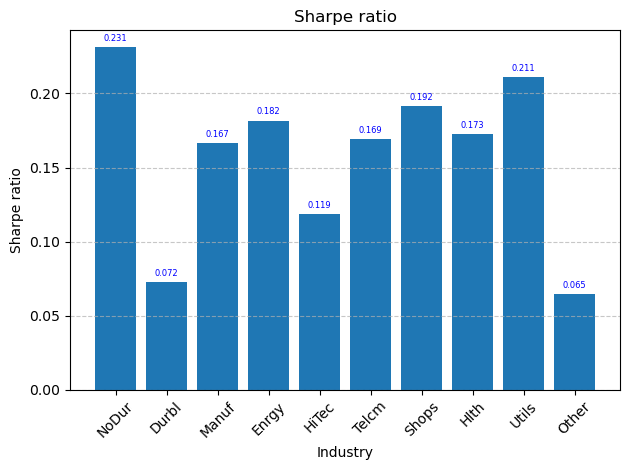

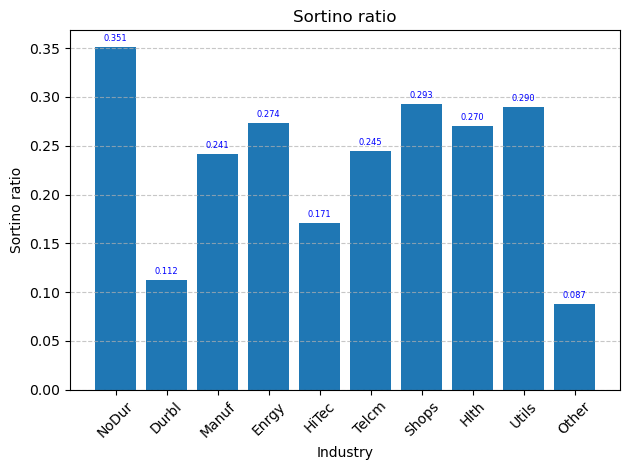

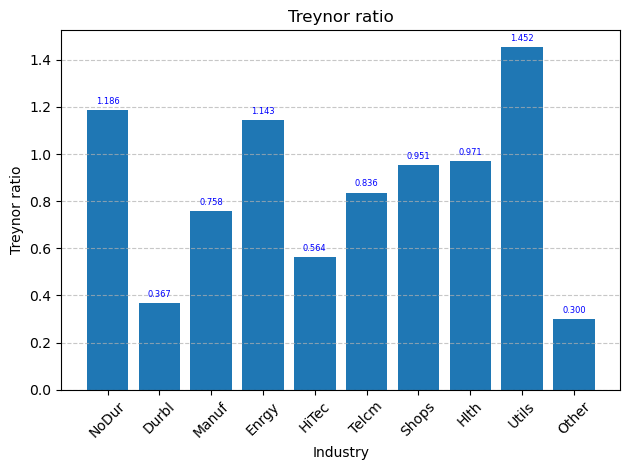

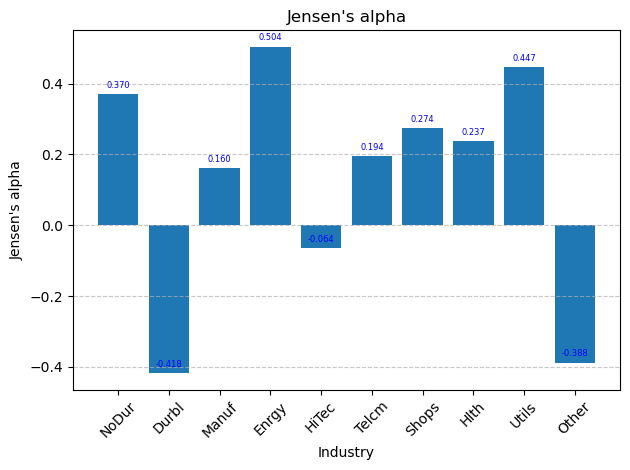

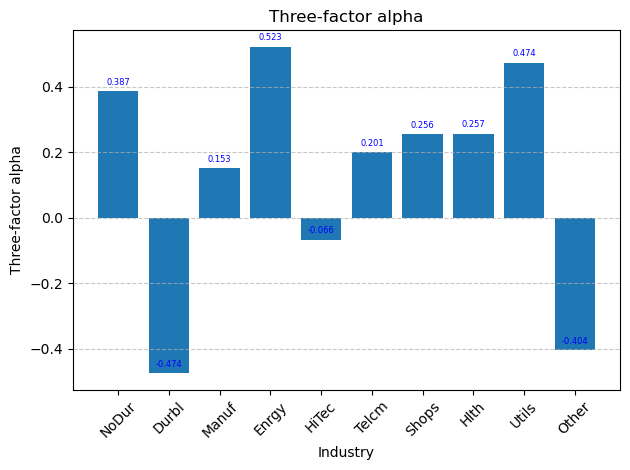

In [57]:
# List of performance metrics to plot
metrics = combined_df.columns[1:]

# Loop through each metric and create a bar chart
for metric in metrics:
   
    bars = plt.bar(combined_df['Industry'], combined_df[metric])  # Swap x and y axes
    plt.xlabel('Industry')
    plt.ylabel(metric)
    plt.title(f'{metric}')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability (optional)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Customize grid appearance as needed
   
 # Annotate each bar with its value
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset for the text
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=6, color='blue')

    plt.tight_layout()  # Ensure proper layout spacing
    plt.show()

# Economic significance:

Sharpe ratio represents risk premium per unit of total risk:
Includes idiosyncratic risk, which penalises individual investments and non-diversified portfolios

Implicitly assumes normal returns, so cannot distinguish between asymmetric return distributions with same variance but different skewness

Sortino ratio represents risk premium per unit of downside risk, which can distinguish between asymmetric return distributions with same variance but different skewness

Treynor ratio represents risk premium per unit of market risk, which ignores idiosyncratic risk as well as other types of systematic risk